In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import folium
from scipy.spatial import cKDTree
from workalendar.europe import Greece
from textblob import TextBlob
import re


In [2]:
# File path
file_path = "C:\\Users\\chimi\\Desktop\\Python Data Science Projects\\airbnb-rentalprice\\task3-eda\\athens_finalrental.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check the data
print(df.head())

   listing_id                                               name  host_id  \
0       10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   
1       10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   
2       10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   
3       10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   
4       10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt    200               1   
1   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt    200               1   
2   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt    200               1   
3   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt    200               1   
4   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt    200               1   

   number_of_reviews  ... number_of_reviews_ltm  reviewe

In [3]:
df.duplicated().sum()

0

In [4]:
# Check for null values
df.isnull().mean()

listing_id                        0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
reviewer_id                       0.000000
date                              0.000000
comments                          0.000000
property_type                     0.000000
city                              0.000000
rating                            0.000000
bedrooms                          0.086828
beds                              0.000046
baths      

In [5]:
# Review the beds and 
df[df['bedrooms'].isna()]

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,number_of_reviews_ltm,reviewer_id,date,comments,property_type,city,rating,bedrooms,beds,baths
73,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,64,1,91,...,4,114526.0,2015-12-28,the studio is very nice and clean it has easy ...,Rental unit,Athens,4.84,NaN,2.0,1.0
74,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,64,1,91,...,4,482984.0,2015-12-30,mr emmanouil and niki are excellent hosts when...,Rental unit,Athens,4.84,NaN,2.0,1.0
75,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,64,1,91,...,4,1456656.0,2016-01-25,perfect hosting great area and emmanouil is re...,Rental unit,Athens,4.84,NaN,2.0,1.0
76,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,64,1,91,...,4,1773608.0,2021-11-06,cozy,Rental unit,Athens,4.84,NaN,2.0,1.0
77,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988880,23.764730,Entire home/apt,64,1,91,...,4,3322748.0,2016-05-24,emmanouil is the perfect hostvery professional...,Rental unit,Athens,4.84,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460681,884280907531664596,Rental unit in Athina · ★New · Studio · 2 beds...,437864658,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.984187,23.737321,Entire home/apt,75,1,2,...,2,33225383.0,2023-06-05,great location and spacious and comfortable flat,Rental unit,Athina,New,NaN,2.0,1.0
460893,891127810465968720,Condo in Athina · ★New · Studio · 1 bed · 1 bath,514394288,ΚΥΨΕΛΗ,37.999338,23.741211,Entire home/apt,46,2,1,...,1,311890367.0,2023-06-08,loved staying at jkapartments such a clean cut...,Condo,Athina,New,NaN,1.0,1.0
461005,897436592980523653,Rental unit in Athina · ★New · Studio · 1 bed ...,47267002,ΠΕΔΙΟ ΑΡΕΩΣ,37.994173,23.732770,Entire home/apt,80,3,1,...,1,4059287.0,2023-06-12,the apartment is perfectly located not directl...,Rental unit,Athina,New,NaN,1.0,1.0
461190,909865477455399540,Rental unit in Athina · ★New · Studio · 3 beds...,465170894,ΝΕΟΣ ΚΟΣΜΟΣ,37.964657,23.728956,Entire home/apt,71,2,1,...,1,35459020.0,2023-06-18,george and his team are great hosts the checki...,Rental unit,Athina,New,NaN,3.0,1.0


In [6]:
# BAthrooms 
df[df['beds'].isna()]

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,number_of_reviews_ltm,reviewer_id,date,comments,property_type,city,rating,bedrooms,beds,baths
264603,27448165,Serviced apartment in Athina · 1 bedroom · 2 beds,206838334,ΘΗΣΕΙΟ,37.978050,23.722880,Hotel room,261,1,2,...,0,29111261.0,2021-08-31,excellent location great value for money and s...,Serviced apartment,Athina,1 bedroom,2.0,NaN,NaN
264604,27448165,Serviced apartment in Athina · 1 bedroom · 2 beds,206838334,ΘΗΣΕΙΟ,37.978050,23.722880,Hotel room,261,1,2,...,0,236495205.0,2021-08-11,amazing location with buzz of the downtown lif...,Serviced apartment,Athina,1 bedroom,2.0,NaN,NaN
331961,34144987,Rental unit in Athens · Studio · 1 bath,1585338,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.986870,23.742170,Entire home/apt,61,5,1,...,1,62734525.0,2022-07-29,good area where mostly locals hang outbrbut al...,Rental unit,Athens,Studio,1.0,NaN,NaN
331962,34144991,Rental unit in Athens · Studio · 1 bath,1585338,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.988250,23.742850,Entire home/apt,61,5,2,...,0,381541140.0,2022-04-10,i was pleasantly surprised by the quality of t...,Rental unit,Athens,Studio,1.0,NaN,NaN
361279,38516893,Rental unit in Athens · 1 bedroom · 2 baths,556615,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.985250,23.729200,Entire home/apt,170,2,1,...,0,295332221.0,2019-09-25,miglen your flat is very nice everything was g...,Rental unit,Athens,1 bedroom,2.0,NaN,NaN
372795,40977090,Rental unit in Athina · 2 bedrooms · 1.5 baths,75367164,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.984800,23.735970,Entire home/apt,139,3,2,...,2,435561898.0,2022-07-28,the perfect place to stay in athens,Rental unit,Athina,2 bedrooms,1.0,NaN,NaN
383579,43501418,Rental unit in Athina · 1 bedroom · 1 bath,47243951,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,37.999590,23.732540,Private room,20,120,2,...,2,455334905.0,2023-02-11,de host was vriendelijk en reageerde snel de k...,Rental unit,Athina,1 bedroom,1.0,NaN,NaN
384058,43608276,Rental unit in Athina · 1 bedroom · 2 shared b...,47243951,ΠΑΤΗΣΙΑ,38.012990,23.733810,Private room,20,120,1,...,1,226556743.0,2022-07-26,great stay a good place to spend time in athens,Rental unit,Athina,1 bedroom,2.0,NaN,NaN
384473,43662192,Tiny home in Athina · 1 bed · 1 bath,5405197,ΛΥΚΑΒΗΤΤΟΣ,37.983310,23.741760,Entire home/apt,46,3,2,...,0,176831720.0,2020-08-31,the appartement was awesome well equiped and c...,Tiny home,Athina,1 bed,1.0,NaN,NaN
384474,43662192,Tiny home in Athina · 1 bed · 1 bath,5405197,ΛΥΚΑΒΗΤΤΟΣ,37.983310,23.741760,Entire home/apt,46,3,2,...,0,343402687.0,2020-08-16,the best airbnb stay we had brmy boyfriend and...,Tiny home,Athina,1 bed,1.0,NaN,NaN


In [7]:
df[df['baths'].isna()]

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,number_of_reviews_ltm,reviewer_id,date,comments,property_type,city,rating,bedrooms,beds,baths
1597,251361,Rental unit in Galatsi · 1 bedroom · 1 bed · 1...,592616,ΑΝΩ ΠΑΤΗΣΙΑ,38.018730,23.74465,Entire home/apt,138,5,1,...,0,4010322.0,2013-05-23,what a lovely apartment my husband baby toddle...,Rental unit,Galatsi,1 bedroom,1.0,1.0,NaN
2272,308157,Rental unit in Athens · Studio · 1 bed · 1 bath,1585338,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.987290,23.74311,Entire home/apt,65,5,2,...,0,3636258.0,2015-06-04,flavia was the most charming hostbreverything ...,Rental unit,Athens,Studio,1.0,1.0,NaN
2273,308157,Rental unit in Athens · Studio · 1 bed · 1 bath,1585338,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.987290,23.74311,Entire home/apt,65,5,2,...,0,6268705.0,2016-04-05,flavia vas very kind host and very responsive ...,Rental unit,Athens,Studio,1.0,1.0,NaN
3521,478626,Bed and breakfast in Athens · 1 bedroom · 1 be...,2370772,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.978430,23.72564,Entire home/apt,120,1,1,...,0,31765116.0,2015-06-12,the host canceled this reservation the day bef...,Bed and breakfast,Athens,1 bedroom,1.0,1.0,NaN
8493,767272,Home in Athens · 2 bedrooms · 1 bed · 3.5 baths,964919,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.984470,23.72112,Entire home/apt,350,3,2,...,0,4365541.0,2014-10-28,very comfortable house in a unique part of ath...,Home,Athens,2 bedrooms,1.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460916,891727835665347371,Rental unit in Athina · ★4.50 · 1 bedroom · 1 ...,277722023,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.980020,23.72596,Entire home/apt,63,4,6,...,6,262085849.0,2023-05-20,le studio est petit comme sur les photos mais ...,Rental unit,Athina,4.50,1.0,1.0,NaN
460917,891727835665347371,Rental unit in Athina · ★4.50 · 1 bedroom · 1 ...,277722023,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.980020,23.72596,Entire home/apt,63,4,6,...,6,394349354.0,2023-06-01,good location bed hard to get into,Rental unit,Athina,4.50,1.0,1.0,NaN
460987,896264512176491832,Rental unit in Athina · ★5.0 · 2 bedrooms · 1....,204301874,ΝΕΟΣ ΚΟΣΜΟΣ,37.964757,23.72830,Entire home/apt,85,3,4,...,4,6184572.0,2023-06-12,we had a wonderful stay great location and bea...,Rental unit,Athina,5.0,2.0,1.0,NaN
460988,896264512176491832,Rental unit in Athina · ★5.0 · 2 bedrooms · 1....,204301874,ΝΕΟΣ ΚΟΣΜΟΣ,37.964757,23.72830,Entire home/apt,85,3,4,...,4,106959987.0,2023-06-08,loved the house and the area is super close to...,Rental unit,Athina,5.0,2.0,1.0,NaN


In [8]:
# Some properties or listing could be studio apartments so for bedrooms-fill the NA with 0

df['bedrooms'].fillna(0, inplace=True)

In [9]:
# It does not seem logical for properties to have 0 beds and 0 baths
# Using the median 

In [10]:
df.columns

Index(['listing_id', 'name', 'host_id', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'reviewer_id', 'date', 'comments',
       'property_type', 'city', 'rating', 'bedrooms', 'beds', 'baths'],
      dtype='object')

In [11]:
# Instead of using KNN-imputation/ Using median due to computational limitation on my labtop
df['beds'].fillna(df['beds'].median(), inplace=True)
df['baths'].fillna(df['baths'].median(), inplace=True)


In [12]:
df.isnull().sum()

listing_id                        0
name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
reviewer_id                       0
date                              0
comments                          0
property_type                     0
city                              0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [13]:
df.head()

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,number_of_reviews_ltm,reviewer_id,date,comments,property_type,city,rating,bedrooms,beds,baths
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,189305.0,2011-05-20,the apartment was wonderful fully equiped beau...,Condo,Athens,4.83,3.0,5.0,2.0
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,289831.0,2012-08-15,emmanouil was an excellent host he provided us...,Condo,Athens,4.83,3.0,5.0,2.0
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,2422327.0,2014-05-04,our stay in emmanouil home was comfortable qui...,Condo,Athens,4.83,3.0,5.0,2.0
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,2635427.0,2013-05-20,manos is a very good host he is kind and helpf...,Condo,Athens,4.83,3.0,5.0,2.0
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,5001999.0,2022-07-02,highly recommend this apartment clean bright a...,Condo,Athens,4.83,3.0,5.0,2.0


In [14]:
# Add more features
# Add nearest train stations
train_station = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/airbnb-rentalprice/data/train_stations_europe.csv')

In [15]:
greece_stations = train_station[train_station['country'] == 'GR']

In [16]:
greece_stations

,id,name,name_norm,uic,latitude,longitude,parent_station_id,country,time_zone,is_city,is_main_station,is_airport,entur_id,entur_is_enabled
26072,28210,Larissa,Larissa,7300238.0,39.629495,22.423015,NaN,GR,Europe/Athens,True,False,False,NaN,False
26073,28211,Volos,Volos,7300356.0,39.364705,22.936457,NaN,GR,Europe/Athens,True,False,False,NaN,False
26074,28212,Thessaloniki,Thessaloniki,7300415.0,40.644470,22.929270,NaN,GR,Europe/Athens,True,False,False,NaN,False
26075,28213,Kozani,Kozani,7300558.0,40.294670,21.792650,NaN,GR,Europe/Athens,True,False,False,NaN,False
26076,28214,Florina,Florina,7300580.0,40.781400,21.415080,NaN,GR,Europe/Athens,True,False,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63847,67990,Rhodes Airport,Rhodes Airport,NaN,36.402490,28.092230,NaN,GR,Europe/Athens,False,False,True,NaN,False
63852,67995,Ialysos,Ialysos,NaN,36.416852,28.160885,NaN,GR,Europe/Athens,True,False,False,NaN,False
63878,68021,Nafplio,Nafplio,NaN,37.565455,22.800385,NaN,GR,Europe/Athens,True,False,False,NaN,False
63895,68038,Aigio,Aigio,NaN,38.248250,22.088849,NaN,GR,Europe/Athens,True,False,False,NaN,False


In [17]:
greece_stations = greece_stations[['latitude','longitude','name']].reset_index(drop=True)

In [18]:
greece_stations.head(5)

,latitude,longitude,name
0,39.629495,22.423015,Larissa
1,39.364705,22.936457,Volos
2,40.644470,22.929270,Thessaloniki
3,40.294670,21.792650,Kozani
4,40.781400,21.415080,Florina


In [19]:
greece_stations['name'].value_counts()

Larissa        1
Nydri          1
Lefkada        1
Thasos         1
Serres         1
              ..
Derveni        1
Sofades        1
Kos Airport    1
Kos            1
Megalopoli     1
Name: name, Length: 91, dtype: int64

In [20]:
df.head(5)

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,number_of_reviews_ltm,reviewer_id,date,comments,property_type,city,rating,bedrooms,beds,baths
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,189305.0,2011-05-20,the apartment was wonderful fully equiped beau...,Condo,Athens,4.83,3.0,5.0,2.0
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,289831.0,2012-08-15,emmanouil was an excellent host he provided us...,Condo,Athens,4.83,3.0,5.0,2.0
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,2422327.0,2014-05-04,our stay in emmanouil home was comfortable qui...,Condo,Athens,4.83,3.0,5.0,2.0
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,2635427.0,2013-05-20,manos is a very good host he is kind and helpf...,Condo,Athens,4.83,3.0,5.0,2.0
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,5001999.0,2022-07-02,highly recommend this apartment clean bright a...,Condo,Athens,4.83,3.0,5.0,2.0


In [21]:
# Initialize a map centered around Greece
greece_map = folium.Map(location=[39.0742, 21.8243], zoom_start=6)

# Add markers for each station
for index, row in greece_stations.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(icon='cloud'),
    ).add_to(greece_map)

# Display the map
greece_map



In [22]:
import requests
import json

# Define the Overpass API endpoint
overpass_url = "http://overpass-api.de/api/interpreter"

# Define the query (make sure to replace the {{bbox}} placeholder if needed)
overpass_query = """
[out:json][timeout:25];
(
  node["railway"="station"]({{bbox}});
  way["railway"="station"]({{bbox}});
  relation["railway"="station"]({{bbox}});
);
out body;
>;
out skel qt;
"""

# You need to replace {{bbox}} with the bounding box for Athens, Attica, Greece or any other desired region.
# For Athens, you can use something like "37.9346,23.6920,37.9932,23.7695"
bbox_athens = "37.9346,23.6920,37.9932,23.7695"
overpass_query = overpass_query.replace("{{bbox}}", bbox_athens)

# Send the query to the Overpass API
response = requests.get(overpass_url, params={'data': overpass_query})

# Parse the JSON response
data = response.json()

# Extract railway stations from the response
stations = []
for element in data['elements']:
    if element['type'] == "node":
        node_id = element['id']
        lat = element['lat']
        lon = element['lon']
        name = element['tags'].get('name', 'n/a') if 'tags' in element else 'n/a'
        stations.append((node_id, lat, lon, name))

print(stations)


[(250702349, 37.9790317, 23.7530087, 'Μέγαρο Μουσικής'), (250702355, 37.9761258, 23.7471036, 'Ευαγγελισμός'), (250920014, 37.9803554, 23.7330199, 'Πανεπιστήμιο'), (251082983, 37.9931743, 23.7301714, 'Βικτώρια'), (251083102, 37.9922822, 23.7207199, 'Σταθμός Λαρίσης'), (251083112, 37.9858525, 23.7213796, 'Μεταξουργείο'), (518535675, 37.9404334, 23.7407042, 'Άγιος Δημήτριος'), (638386566, 37.9876122, 23.6938539, 'Ελαιώνας'), (850935197, 37.9787426, 23.7109568, 'Κεραμεικός'), (987485685, 37.973633, 23.7039652, 'Ρουφ'), (1957144317, 37.9564304, 23.7346855, 'Άγιος Ιωάννης'), (1957144319, 37.9688593, 23.7295312, 'Ακρόπολη'), (1957144325, 37.9576705, 23.7283724, 'Νέος Κόσμος'), (1957144329, 37.9646255, 23.7268179, 'Συγγρού-Φιξ'), (1958901557, 37.9871933, 23.7576802, 'Αμπελόκηποι'), (2148380652, 37.9687965, 23.6934298, 'Ταύρος'), (2264949791, 37.9604095, 23.6969304, 'Καλλιθέα'), (2278849833, 37.968347, 23.7090441, 'Πετράλωνα'), (2278849834, 37.9624859, 23.7034811, 'Ταύρος-Ελευθέριος Βενιζέλος')

In [23]:
# Convert the list of stations into a DataFrame
stations_df = pd.DataFrame(stations, columns=['node_id', 'latitude', 'longitude', 'name'])

In [24]:
stations_df

,node_id,latitude,longitude,name
0,250702349,37.979032,23.753009,Μέγαρο Μουσικής
1,250702355,37.976126,23.747104,Ευαγγελισμός
2,250920014,37.980355,23.733020,Πανεπιστήμιο
3,251082983,37.993174,23.730171,Βικτώρια
4,251083102,37.992282,23.720720,Σταθμός Λαρίσης
...,...,...,...,...
67,5777189643,37.994135,23.720575,n/a
68,5777189644,37.991496,23.719877,n/a
69,5777189645,37.991480,23.719978,n/a
70,5777189646,37.994118,23.720675,n/a


In [25]:
# Convert latitudes and longitudes to Cartesian coordinates:
def lat_lon_to_cartesian(lat, lon, R=6371):
    """
    Convert latitude and longitude values to Cartesian coordinates.
    """
    x = R * np.cos(np.radians(lat)) * np.cos(np.radians(lon))
    y = R * np.cos(np.radians(lat)) * np.sin(np.radians(lon))
    z = R * np.sin(np.radians(lat))
    return x, y, z


In [26]:

# Convert station coordinates to Cartesian system
stations_df['x'], stations_df['y'], stations_df['z'] = zip(*stations_df.apply(lambda row: lat_lon_to_cartesian(row['latitude'], row['longitude']), axis=1))

# Convert property coordinates in the original df to Cartesian system
df['x'], df['y'], df['z'] = zip(*df.apply(lambda row: lat_lon_to_cartesian(row['latitude'], row['longitude']), axis=1))

# Build a KDTree for stations
tree = cKDTree(list(zip(stations_df['x'], stations_df['y'], stations_df['z'])))

# Query the KDTree for the nearest station for each property
distances, indices = tree.query(list(zip(df['x'], df['y'], df['z'])))

# The result 'distances' gives the distances to the nearest station for each property
df['MinDisplacement'] = distances
df['NearestStation'] = stations_df.iloc[indices]['name'].values

# Drop temporary cartesian columns
df = df.drop(columns=['x', 'y', 'z'])
stations_df = stations_df.drop(columns=['x', 'y', 'z'])


In [27]:
df.head(5)

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,date,comments,property_type,city,rating,bedrooms,beds,baths,MinDisplacement,NearestStation
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,2011-05-20,the apartment was wonderful fully equiped beau...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,2012-08-15,emmanouil was an excellent host he provided us...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,2014-05-04,our stay in emmanouil home was comfortable qui...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,2013-05-20,manos is a very good host he is kind and helpf...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,2022-07-02,highly recommend this apartment clean bright a...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι


In [28]:
# Geographical distribution of all the metro stations

# Create a base map
m = folium.Map(location=[stations_df['latitude'].mean(), stations_df['longitude'].mean()], zoom_start=12)

# Add a marker for every station in the dataframe
for idx, row in stations_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(icon='train', prefix='fa')  # use a train icon for stations
    ).add_to(m)

# Display the map
m

In [29]:
# What is the first displacement and nearest stations?
# Using Eculidean distance to find the nearest train stations for each property listings
# Extract coordinates for the first listing
first_listing_coords = df[["latitude", "longitude"]].iloc[0].values.tolist()

# Calculate the Euclidean distance between the first listing and all stations
distances = stations_df.apply(
    lambda row: ((first_listing_coords[0] - row["latitude"])**2 + (first_listing_coords[1] - row["longitude"])**2)**0.5,
    axis=1
)

# Find the index of the nearest station
nearest_station_idx = distances.idxmin()

# Extract details of the nearest station
nearest_station = stations_df.loc[nearest_station_idx]

print(f"The first listing has a minimum displacement of {distances.min():.2f} units to the nearest station {nearest_station['name']}.")


The first listing has a minimum displacement of 0.01 units to the nearest station Αμπελόκηποι.


In [30]:
# Convert latitudes and longitudes to Cartesian coordinates:
def lat_lon_to_cartesian(lat, lon, R=6371):
    """
    Convert latitude and longitude values to Cartesian coordinates.
    """
    x = R * np.cos(np.radians(lat)) * np.cos(np.radians(lon))
    y = R * np.cos(np.radians(lat)) * np.sin(np.radians(lon))
    z = R * np.sin(np.radians(lat))
    return x, y, z



In [31]:

# Convert station coordinates to Cartesian system
stations_df['x'], stations_df['y'], stations_df['z'] = zip(*stations_df.apply(lambda row: lat_lon_to_cartesian(row['latitude'], row['longitude']), axis=1))

# Convert property coordinates in the original df to Cartesian system
df['x'], df['y'], df['z'] = zip(*df.apply(lambda row: lat_lon_to_cartesian(row['latitude'], row['longitude']), axis=1))

# Build a KDTree for stations
tree = cKDTree(list(zip(stations_df['x'], stations_df['y'], stations_df['z'])))

# Query the KDTree for the nearest station for each property
distances, indices = tree.query(list(zip(df['x'], df['y'], df['z'])))

# The result 'distances' gives the distances to the nearest station for each property
df['MinDisplacement'] = distances
df['NearestStation'] = stations_df.iloc[indices]['name'].values

# Drop temporary cartesian columns
df = df.drop(columns=['x', 'y', 'z'])
stations_df = stations_df.drop(columns=['x', 'y', 'z'])

In [32]:
df.head(5)

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,date,comments,property_type,city,rating,bedrooms,beds,baths,MinDisplacement,NearestStation
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,2011-05-20,the apartment was wonderful fully equiped beau...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,2012-08-15,emmanouil was an excellent host he provided us...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,2014-05-04,our stay in emmanouil home was comfortable qui...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,2013-05-20,manos is a very good host he is kind and helpf...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,2022-07-02,highly recommend this apartment clean bright a...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι


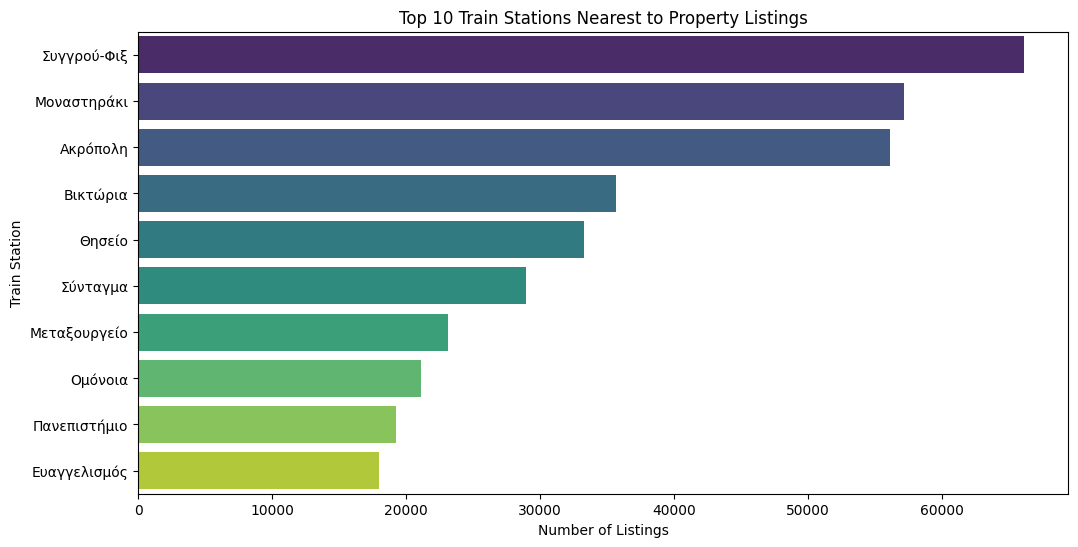

In [33]:
# What are the top 10 Nearest metro station for property listings?
top_stations = df['NearestStation'].value_counts().head(10)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(y=top_stations.index, x=top_stations.values, palette="viridis")
plt.title('Top 10 Train Stations Nearest to Property Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Train Station')
plt.show()

In [34]:
# Get holidays for 2022 and 2023
cal = Greece()
holidays_2022 = cal.holidays(2022)
holidays_2023 = cal.holidays(2023)

# Combine the holidays of both years
all_holidays = holidays_2022 + holidays_2023

# Convert to DataFrame
df_holidays = pd.DataFrame(all_holidays, columns=['Date', 'Holiday'])

df_holidays

,Date,Holiday
0,2022-01-01,New year
1,2022-01-06,Epiphany
2,2022-03-07,Clean Monday
3,2022-03-25,Annunciation
4,2022-03-25,Independence Day
5,2022-04-22,Good Friday
6,2022-04-24,Easter Sunday
7,2022-04-25,Easter Monday
8,2022-05-01,Labour Day
9,2022-06-12,Pentecost


In [35]:
# Convert the 'date' column of your original DataFrame to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new 'IsHoliday' column and set it to True for dates that are holidays
df['IsHoliday'] = df['date'].isin(df_holidays['Date'])


In [36]:
df.head(5)

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,comments,property_type,city,rating,bedrooms,beds,baths,MinDisplacement,NearestStation,IsHoliday
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,the apartment was wonderful fully equiped beau...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,emmanouil was an excellent host he provided us...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,our stay in emmanouil home was comfortable qui...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,manos is a very good host he is kind and helpf...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,highly recommend this apartment clean bright a...,Condo,Athens,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False


In [37]:
# Convert the 'Date' column in df_holidays to datetime format
df_holidays['Date'] = pd.to_datetime(df_holidays['Date'])

# Now, get the dates
review_dates = np.array(df['date'].dt.date.values.tolist())
holiday_dates = np.array(df_holidays['Date'].dt.date.values.tolist())

# Initialize lists
holidayDateDiffList = []
holidayIdxList = []

# Iterate over review dates
for review_date in review_dates:
    # Calculate differences using numpy broadcasting
    date_diffs = np.abs(holiday_dates - review_date)
    
    # Get minimum difference and its index
    min_diff = np.min(date_diffs)
    min_diff_idx = np.argmin(date_diffs)
    
    # Append to lists
    holidayDateDiffList.append(min_diff)
    holidayIdxList.append(min_diff_idx)


In [38]:
# Add the calculated days and nearest holiday name to the main DataFrame
df['holidayDateDiff'] = [i.days for i in holidayDateDiffList]
holidayNameList = df_holidays['Holiday'].values.tolist()
df["nearestHoliday"] = [holidayNameList[i] for i in holidayIdxList]

# Get the count of each nearest holiday
holiday_counts = df['nearestHoliday'].value_counts()

# Print the results
print(holiday_counts)

New year                        287506
Assumption of Mary to Heaven     34755
Whit Monday                      25027
Ohi Day                          23774
Labour Day                       20711
Pentecost                        19739
Clean Monday                     13088
Annunciation                     10873
Good Friday                       9068
Epiphany                          7217
Christmas Day                     4192
Easter Monday                     3834
Easter Sunday                      758
Glorifying Mother of God           679
Name: nearestHoliday, dtype: int64


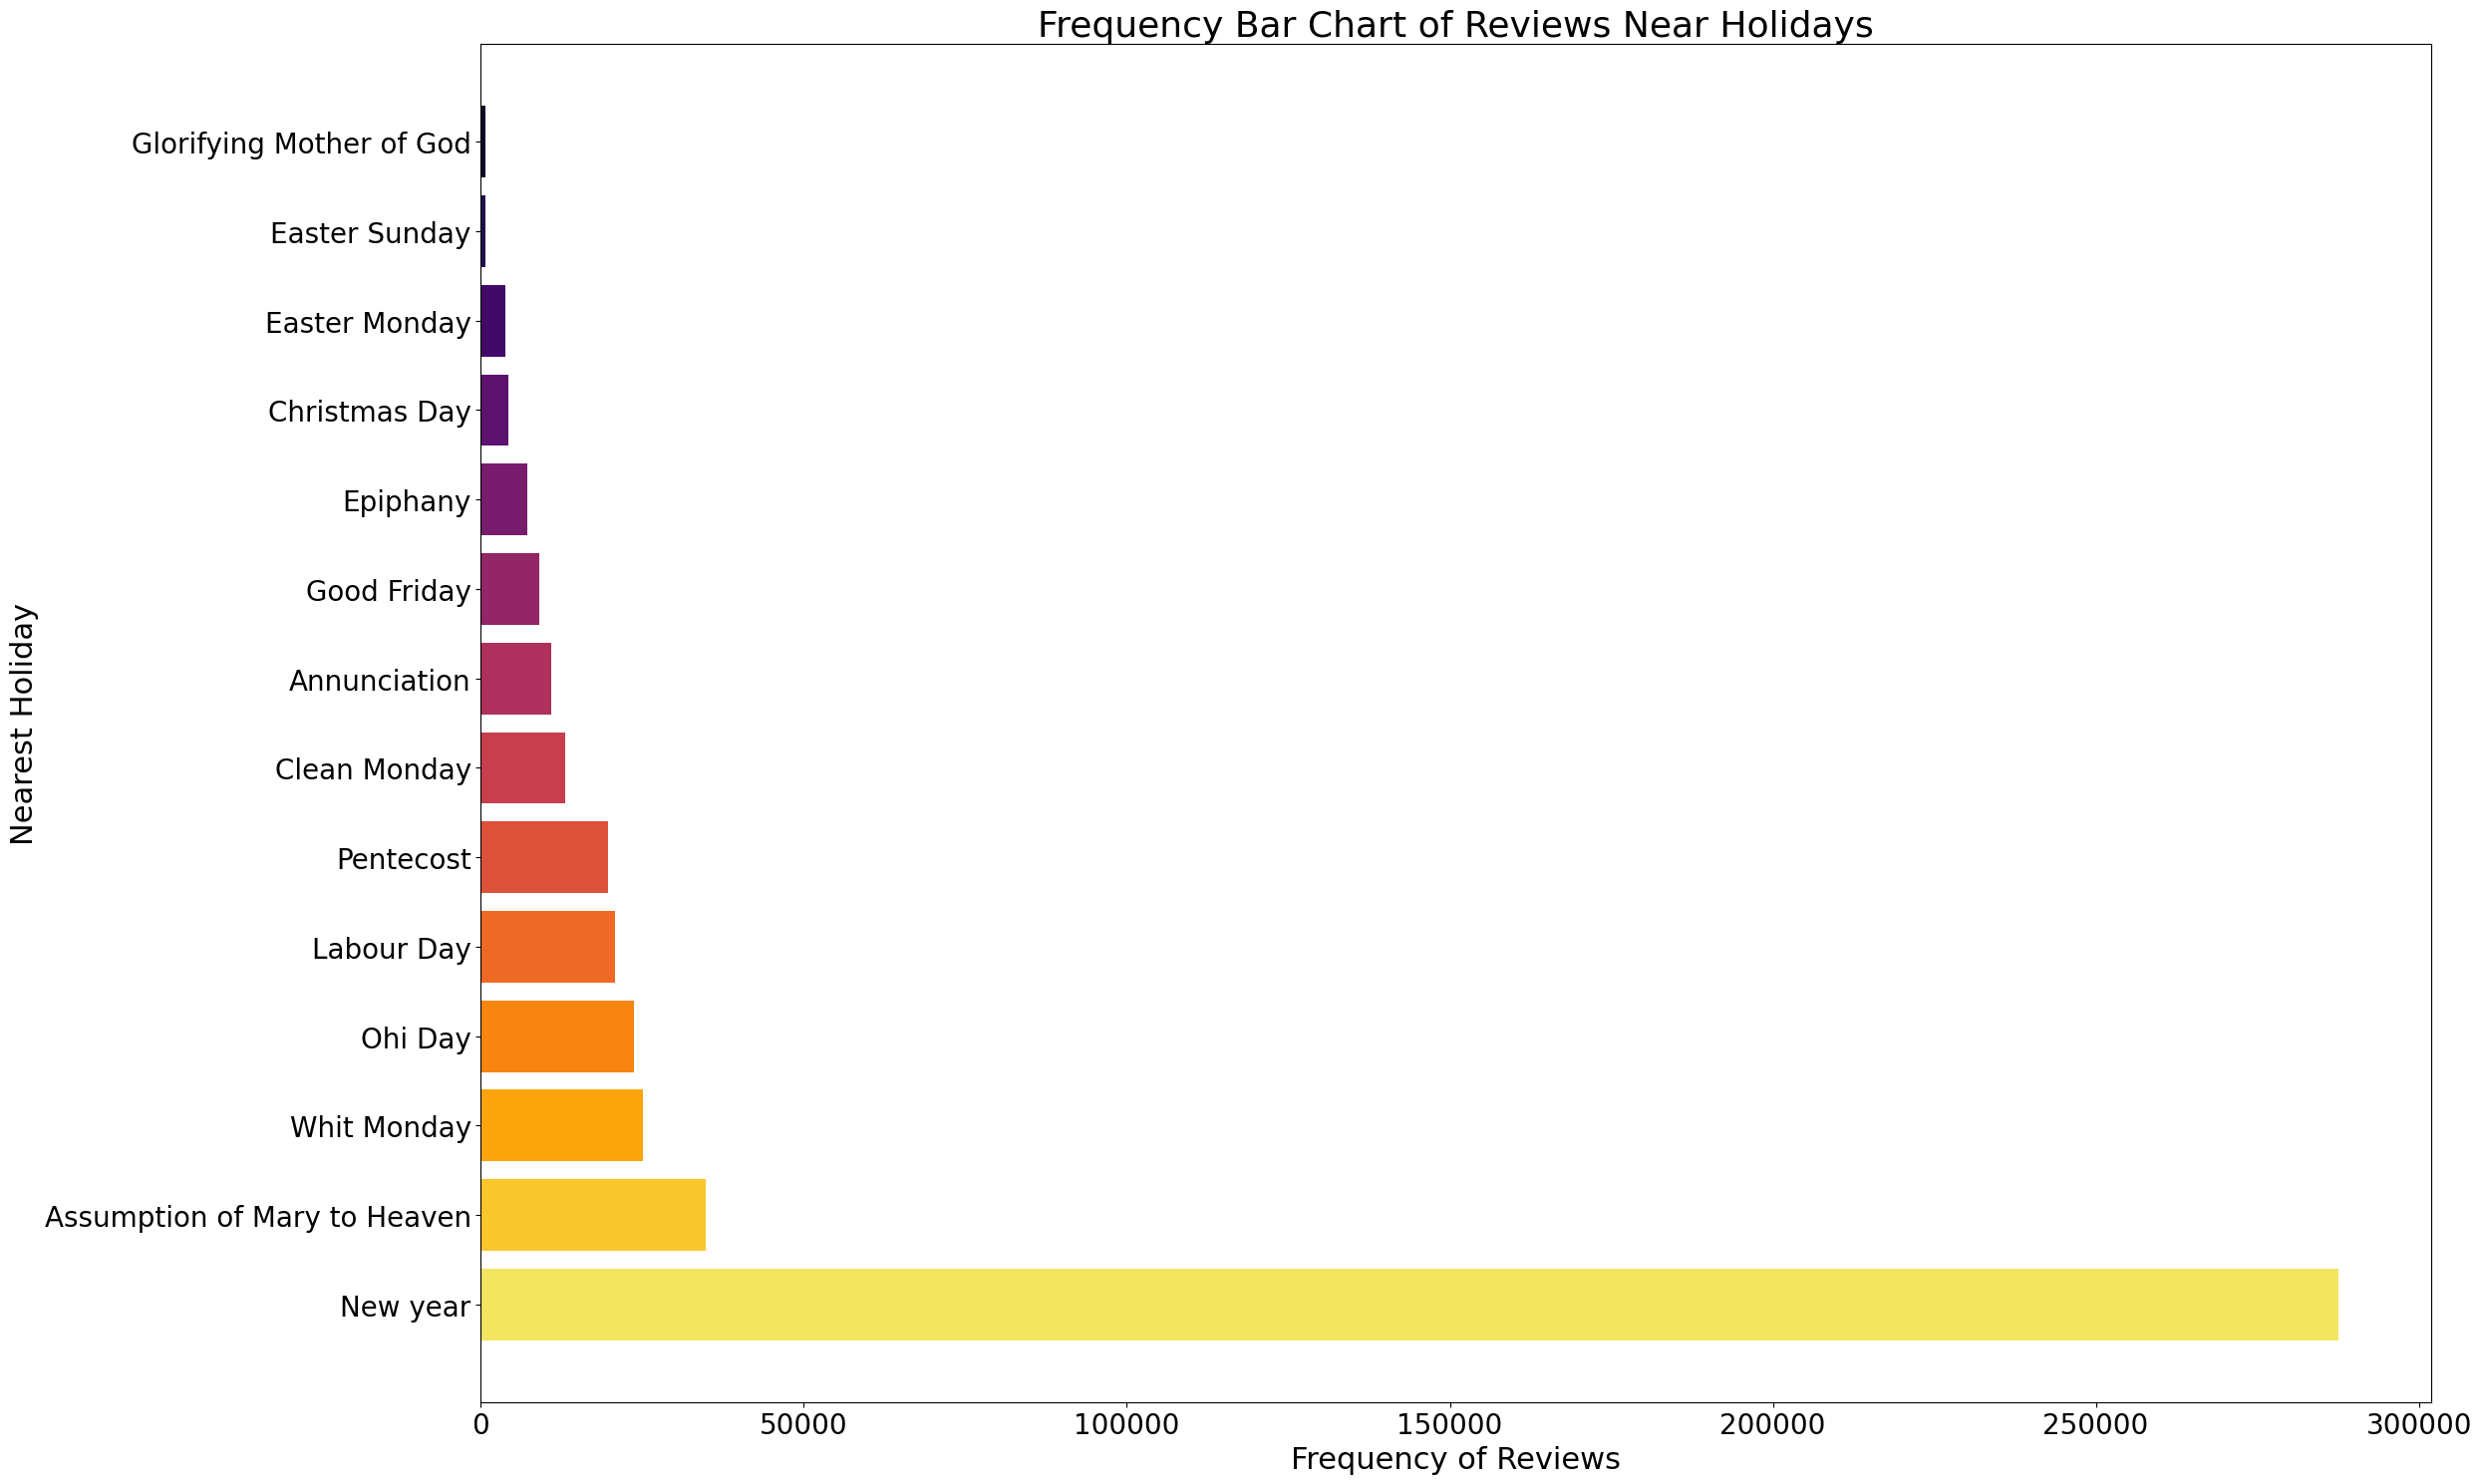

In [39]:
# What are the frequency of reviews near Holidays?

holiday_counts = df['nearestHoliday'].value_counts()
holidays = holiday_counts.index
counts = holiday_counts.values

# Creating the color palette
num_colors = len(holidays)
colors = sns.color_palette("inferno_r", num_colors)


# Plotting
fig, ax = plt.subplots(figsize=(25,15))
ax.barh(holidays, counts, color=colors)


# Setting title and labels
ax.set_title('Frequency Bar Chart of Reviews Near Holidays', fontsize=26)
ax.set_xlabel('Frequency of Reviews', fontsize=22)
ax.set_ylabel('Nearest Holiday', fontsize=22)
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Saving and displaying the plot
plt.tight_layout()
plt.show()








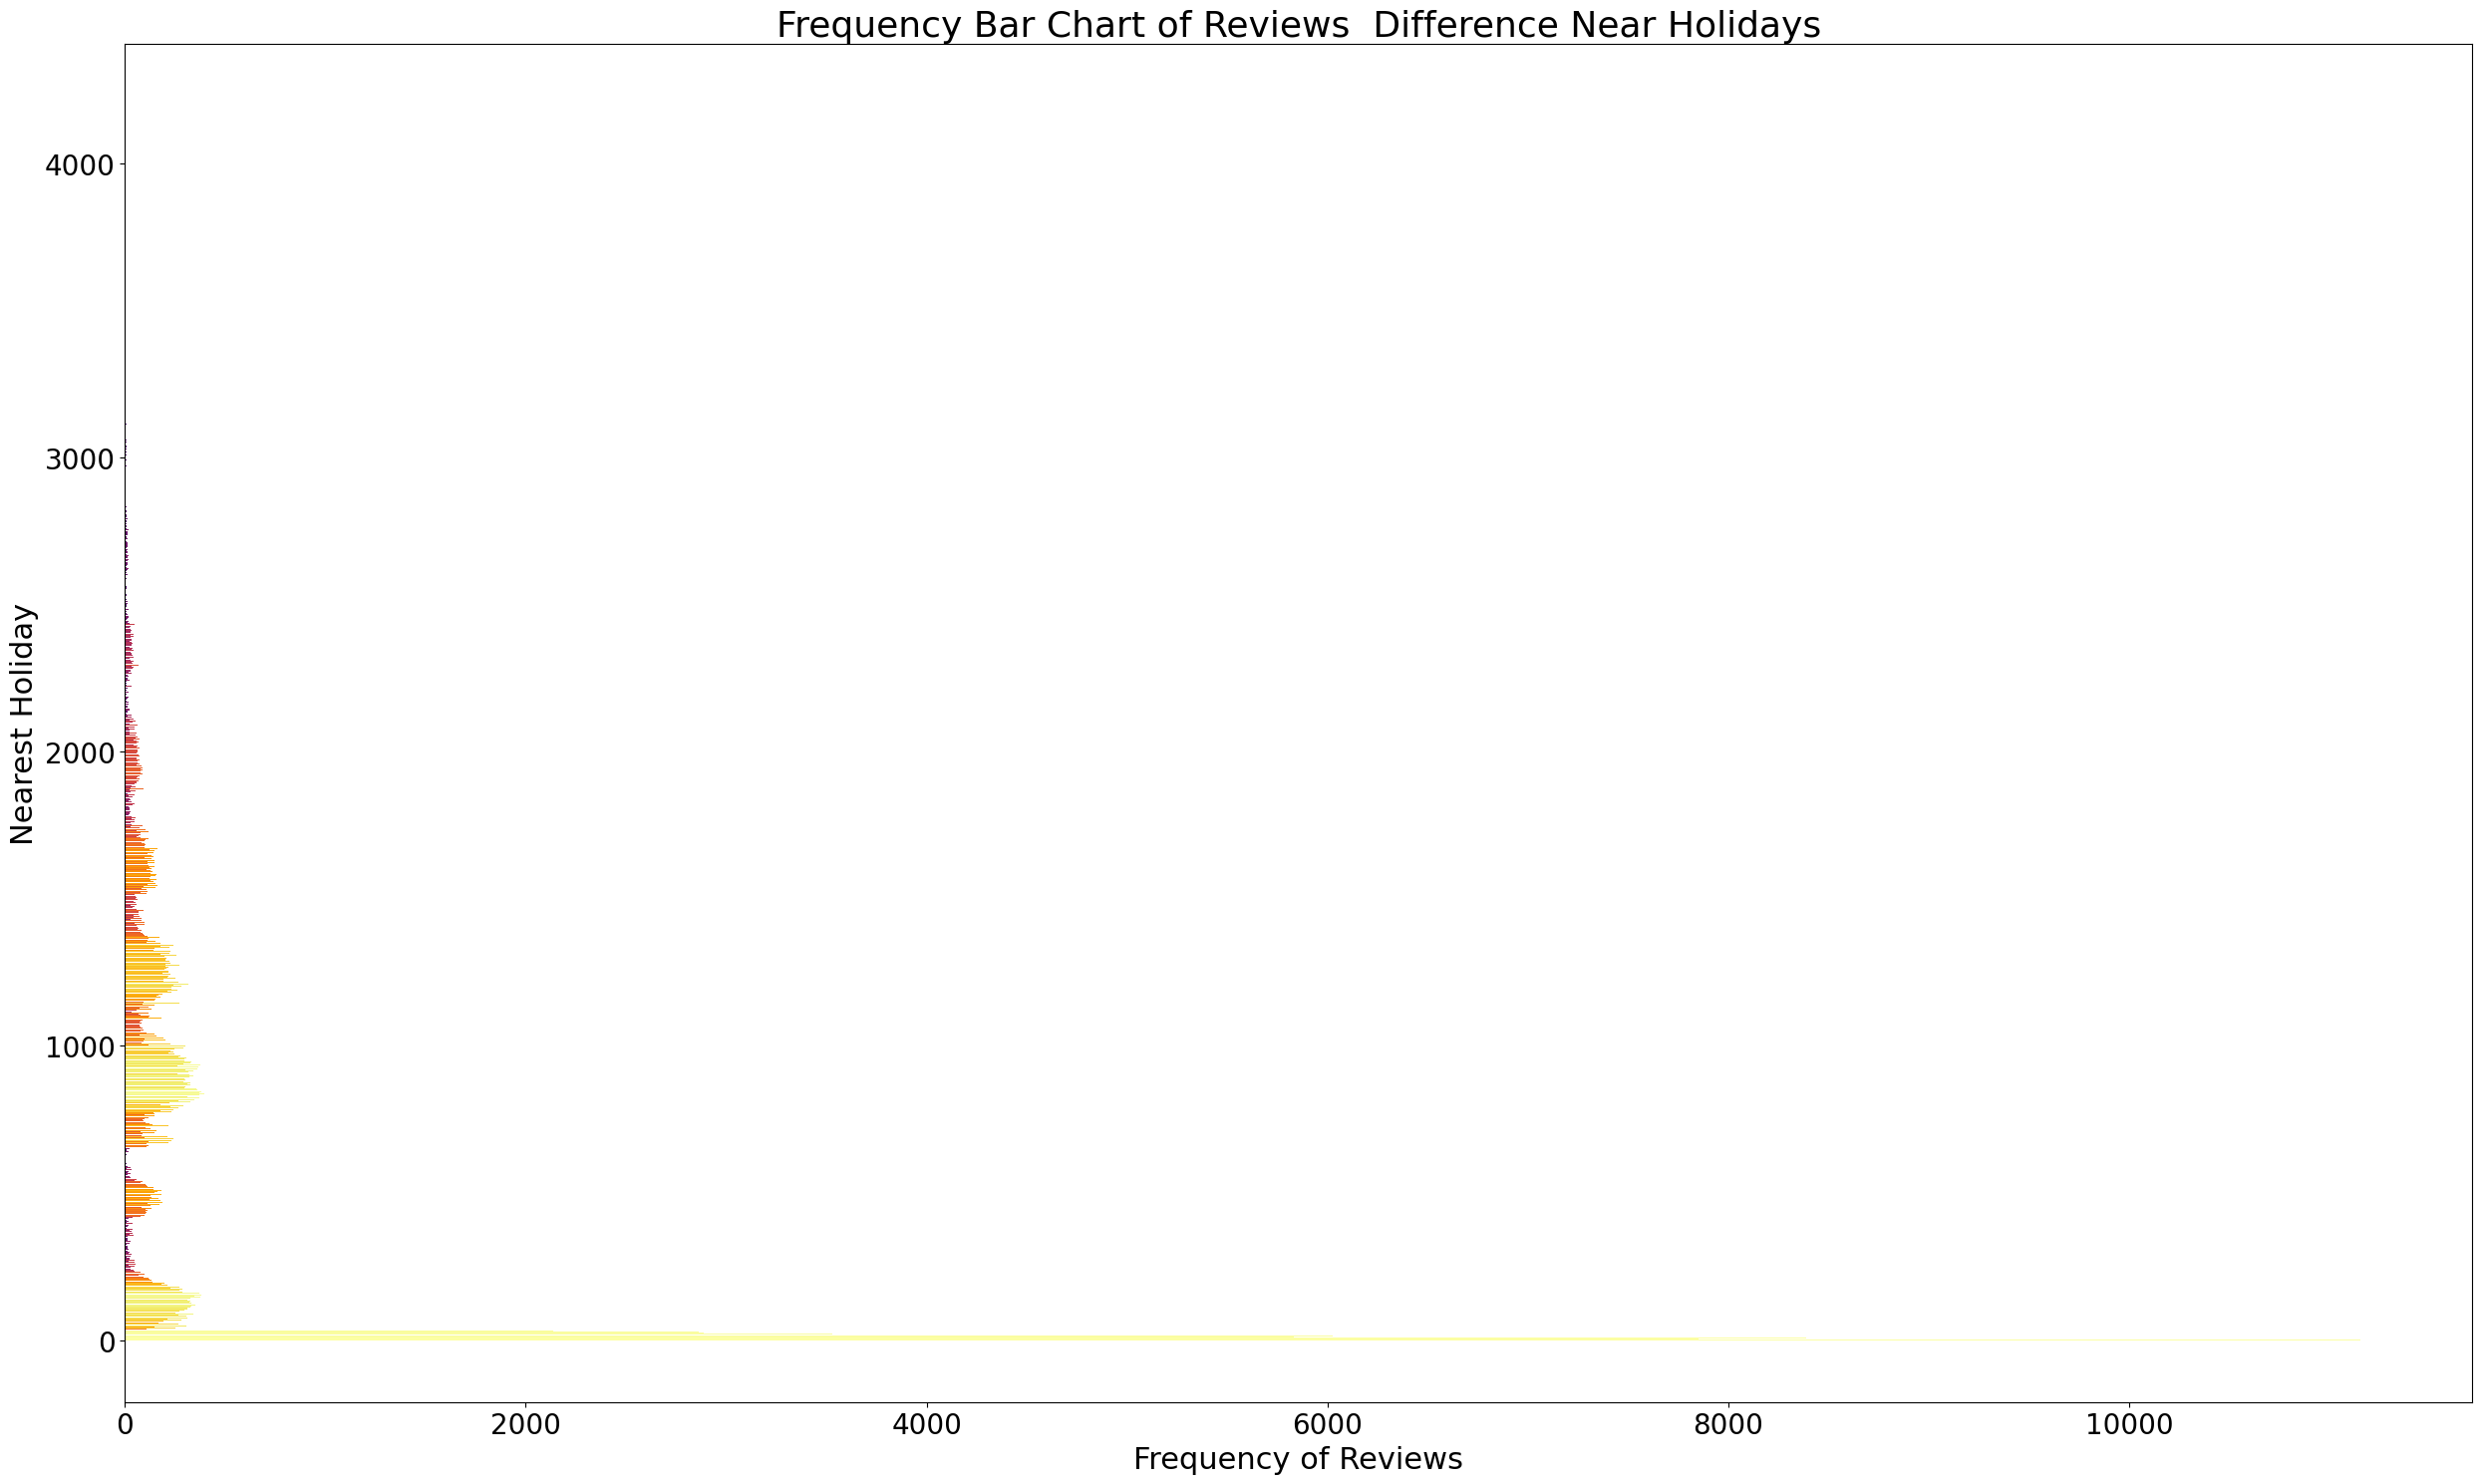

In [40]:
# What about the difference between the review data to the nearest holiday?

holiday_counts = df['holidayDateDiff'].value_counts()
holidays = holiday_counts.index
counts = holiday_counts.values

# Creating the color palette
num_colors = len(holidays)
colors = sns.color_palette("inferno_r", num_colors)


# Plotting
fig, ax = plt.subplots(figsize=(25,15))
ax.barh(holidays, counts, color=colors)


# Setting title and labels
ax.set_title('Frequency Bar Chart of Reviews  Difference Near Holidays', fontsize=26)
ax.set_xlabel('Frequency of Reviews', fontsize=22)
ax.set_ylabel('Nearest Holiday', fontsize=22)
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Saving and displaying the plot
plt.tight_layout()
plt.show()



In [44]:
df['comments']

0         the apartment was wonderful fully equiped beau...
1         emmanouil was an excellent host he provided us...
2         our stay in emmanouil home was comfortable qui...
3         manos is a very good host he is kind and helpf...
4         highly recommend this apartment clean bright a...
                                ...                        
461216    the place was nice and quiet with the doublepa...
461217    1010 it was amongst the best stays i had arran...
461218                 if i could give them 6 stars i would
461219    el alojamiento esta cerca del metro recien ref...
461220    lovely place in athens the flat is just renova...
Name: comments, Length: 461221, dtype: object

In [41]:

def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df['sentiment'] = df['comments'].apply(get_sentiment)


In [42]:
df

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,rating,bedrooms,beds,baths,MinDisplacement,NearestStation,IsHoliday,holidayDateDiff,nearestHoliday,sentiment
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,200,1,41,...,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False,3879,New year,0.547333
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,200,1,41,...,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False,3426,New year,0.366171
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,200,1,41,...,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False,2799,New year,0.260238
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,200,1,41,...,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False,3148,New year,0.512778
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.988630,23.765270,Entire home/apt,200,1,41,...,4.83,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False,19,Whit Monday,0.387778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461216,914583146529105583,Rental unit in Athina · ★New · 2 bedrooms · 4 ...,110277377,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.977139,23.735973,Entire home/apt,349,2,1,...,New,2.0,4.0,2.0,0.183069,Σύνταγμα,False,20,Whit Monday,0.400000
461217,915002336511042858,Rental unit in Athina · ★New · 2 bedrooms · 3 ...,382214747,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,37.967449,23.728784,Entire home/apt,99,2,1,...,New,2.0,3.0,2.0,0.169974,Ακρόπολη,False,20,Whit Monday,0.750000
461218,917863112795908399,Rental unit in Athina · ★New · 1 bedroom · 2 b...,424002907,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,37.988870,23.728830,Entire home/apt,51,1,1,...,New,1.0,2.0,1.0,0.492841,Βικτώρια,False,19,Whit Monday,0.000000
461219,918253673938442892,Condo in Athina · ★New · 3 bedrooms · 5 beds ·...,434609411,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.006959,23.728220,Entire home/apt,76,1,1,...,New,3.0,5.0,1.0,1.542310,Βικτώρια,False,19,Whit Monday,0.000000


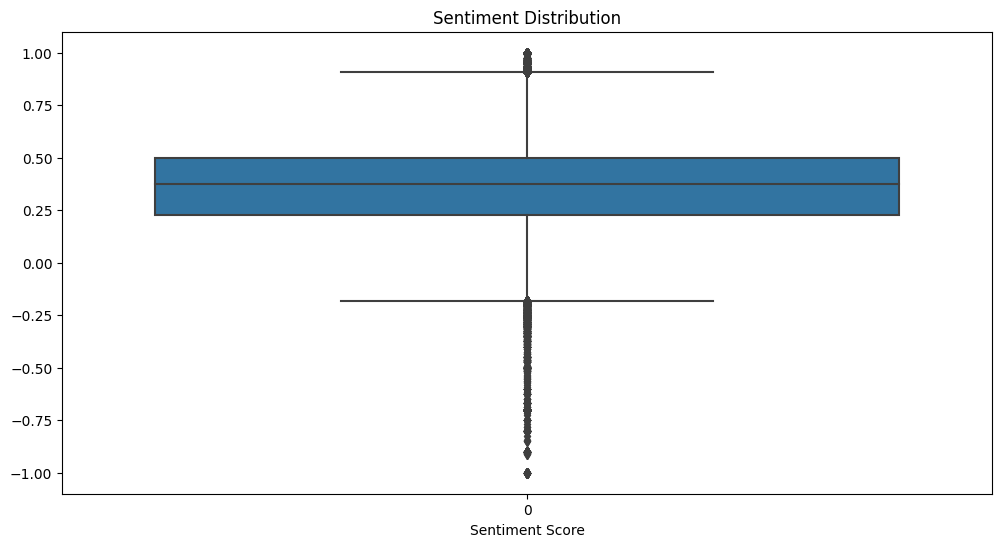

In [45]:

# Plotting the boxplot for sentiments
plt.figure(figsize=(12, 6))
sns.boxplot(df['sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.show()

C:\Users\chimi\AppData\Local\Temp\ipykernel_19996\2584784772.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['sentiment'], y=df['price'],palette='viridis')


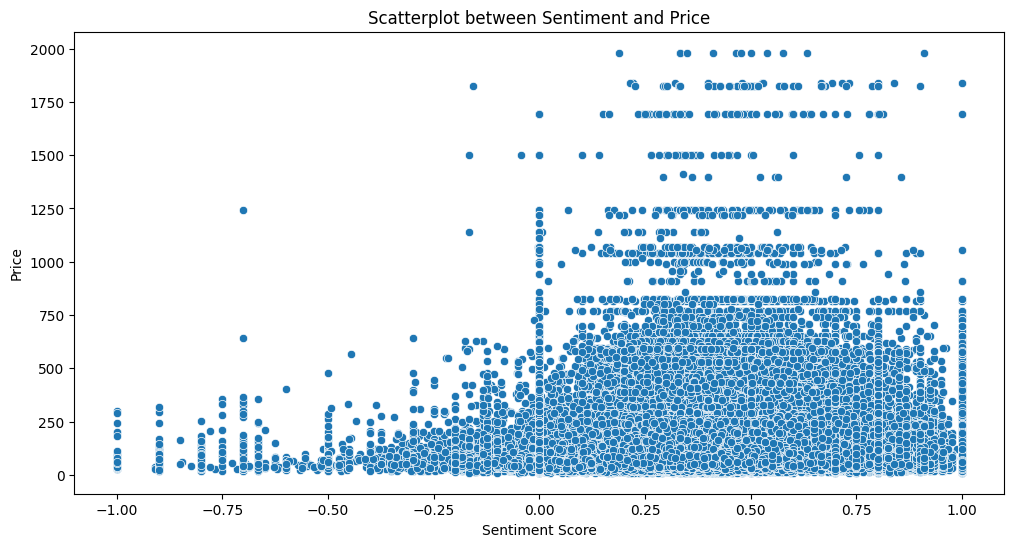

In [48]:
# Generate scatter plot between sentiment and price
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['sentiment'], y=df['price'],palette='viridis')
plt.title("Scatterplot between Sentiment and Price")
plt.xlabel("Sentiment Score")
plt.ylabel("Price")
plt.show()


In [54]:
# Search for any female preferneces
df['FemalePref'] = df['name'].str.contains('Female', flags=re.IGNORECASE, na=False).astype(int)

In [55]:
df.head(5)

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,bedrooms,beds,baths,MinDisplacement,NearestStation,IsHoliday,holidayDateDiff,nearestHoliday,sentiment,FemalePref
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False,3879,New year,0.547333,0
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False,3426,New year,0.366171,0
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False,2799,New year,0.260238,0
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False,3148,New year,0.512778,0
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,3.0,5.0,2.0,0.684065,Αμπελόκηποι,False,19,Whit Monday,0.387778,0


In [53]:
df['FemalePref'].value_counts()

# Not cleaning name - already cleaned 

0    461221
Name: FemalePref, dtype: int64

In [59]:
# Save the new final cleaned file

df.to_csv('athens_rentalmodelingdata.csv',index=False)